In [ ]:
import pandas as pd
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Generating P(F|C) and P(C|F) histograms

In [ ]:
gf = nx.read_gexf('/content/drive/MyDrive/social_link_prediction/milestone2/nyc_friends.gexf')
df = nx.to_pandas_edgelist(gf)

In [ ]:
df.head()

,source,target,id,friends,weight
0,192373,83981,0,NaN,1.0
1,192373,863870,1,NaN,1.0
2,83981,9490,2,NaN,1.0
3,83981,154258,3,NaN,1.0
4,83981,657075,4,NaN,1.0


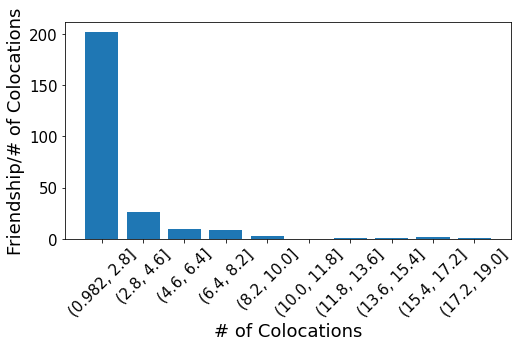

In [ ]:
# P(F|C)
import matplotlib.pylab as plt
bins = pd.cut(df["weight"],bins=10)
fc_dict = df.groupby(bins)["friends"].count().to_dict()
x = []
y = []
fc_dict.items()
for item in fc_dict.items():
  x.append(str(item[0]))
  y.append(item[1])

# x, y = zip(*lists) # unpack a list of pairs into two tuples
# print(fc_dict)
plt.figure(figsize=(8,4))
plt.rcParams.update({'font.size': 15})
plt.bar(x, y)
plt.xlabel("# of Colocations", fontsize=18)
plt.ylabel("Friendship/# of Colocations", fontsize=18)
plt.xticks(rotation=45)
plt.show()

In [ ]:
grouped_df = df.groupby("friends")
friends_df = grouped_df.get_group(True)
friends_df.shape

(255, 5)

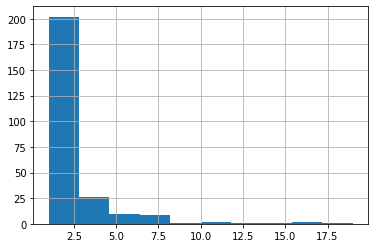

In [ ]:
# P(C|F)
friends_df["weight"].hist()

#For Tokyo


In [ ]:
gf_tky = nx.read_gexf('/content/drive/MyDrive/social_link_prediction/milestone2/tky_friends.gexf')
df_tky = nx.to_pandas_edgelist(gf_tky)

In [ ]:
#P(F|C)
bins = pd.cut(df_tky["weight"],bins=15)
print(df_tky.groupby(bins)["friends"].count())

weight
(0.951, 4.267]      1767
(4.267, 7.533]        75
(7.533, 10.8]         21
(10.8, 14.067]        16
(14.067, 17.333]      10
(17.333, 20.6]         1
(20.6, 23.867]         3
(23.867, 27.133]       2
(27.133, 30.4]         0
(30.4, 33.667]         1
(33.667, 36.933]       0
(36.933, 40.2]         0
(40.2, 43.467]         0
(43.467, 46.733]       0
(46.733, 50.0]         1
Name: friends, dtype: int64


In [ ]:
grouped_df = df_tky.groupby("friends")
friends_df = grouped_df.get_group(True)
friends_df.shape

(1897, 5)

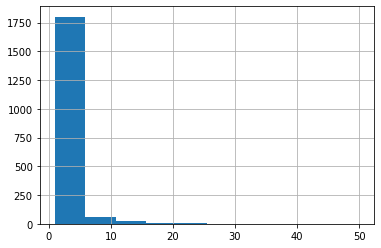

In [ ]:
#P(C|F)
friends_df["weight"].hist()